### FinanceDataReader
코스피 기업들의 price return을 가져오기 위해 FinanceDataReader라는 국내 해외주식, 환율, 암호화폐 데이터를 제공하는 파이썬 라이브러리를 사용하였습니다.

In [5]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

# matplotlib rebuild

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/nanumgothicbold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

#matplotlib 컬러맵 생성
def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

In [6]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

### 전체 종목 코드
<한국> : KRX, KOSPI, KOSDAQ, KONEX

<미국> : NASDAQ, NYSE, AMEX, SP500

In [20]:
df_krx = fdr.StockListing('KRX') #KRX 데이터
df_kospi = fdr.StockListing('KOSPI') #KOSPI 데이터
df_untokenized = pd.read_csv('./data/df_sort.csv', index_col = 0)
df_untokenized = df_untokenized.loc[:,('crp_nm','crp_cd','rpt_nm','str')]

In [21]:
df_kospi

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010120,LS산전,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업","고압기기,저압기기,변압기,배전반,PLC,인버터,빌딩설비,공조기,건축배관,자동화기기 ..."
...,...,...,...,...
794,011210,현대위아,자동차 신품 부품 제조업,"자동차부품, 공작기계 등"
795,005380,현대자동차,자동차용 엔진 및 자동차 제조업,"자동차(승용차,버스,트럭,특장차),자동차부품,자동차전착도료 제조,차량정비사업"
796,011760,현대종합상사,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발"
797,010690,화신,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조"


In [ ]:
df

In [7]:
len(df_kospi['Sector'].unique())
sector_ls = [x for x in df_kospi.Sector.unique()]

kospi기업들의 sector 수는 127개입니다. 추후 sector별 rd&a 의 유사도를 확인하는데 사용하겠습니다. sector가 너무 많아 어느정도 통합이 필요할 것 같습니다

In [8]:
sector_count = df_kospi.groupby('Sector')['Symbol'].count().sort_values(ascending=False)
sector_count[sector_count.values==1]

Sector
그외 기타 제품 제조업            1
그외 기타 운송장비 제조업          1
건축자재, 철물 및 난방장치 도매업     1
그외 기타 개인 서비스업           1
자동차 판매업                 1
재 보험업                   1
전구 및 조명장치 제조업           1
경비, 경호 및 탐정업            1
제재 및 목재 가공업             1
건물설비 설치 공사업             1
개인 및 가정용품 임대업           1
가정용 기기 제조업              1
가전제품 및 정보통신장비 소매업       1
전기업                     1
금속 주조업                  1
연료 소매업                  1
자동차 부품 및 내장품 판매업        1
음식점업                    1
악기 제조업                  1
신발 및 신발 부분품 제조업         1
철도장비 제조업                1
스포츠 서비스업                1
석탄 광업                   1
산업용 농·축산물 및 동·식물 도매업    1
산업용 기계 및 장비 임대업         1
비알코올음료 및 얼음 제조업         1
의료용 기기 제조업              1
기타 비금속광물 광업             1
동물용 사료 및 조제식품 제조업       1
도축, 육류 가공 및 저장 처리업      1
담배 제조업                  1
인형,장난감 및 오락용품 제조업       1
증기, 냉·온수 및 공기조절 공급업     1
일반 및 생활 숙박시설 운영업        1
기타 전기장비 제조업             1
기타 상품 전문 소매업            1
기타 종이 및 판지 제품 제조업       1
Name: Symbol, dtype: int64

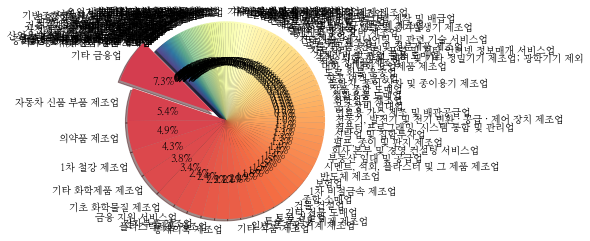

In [9]:
values = sector_count.values
labels = sector_count.index

n = len(labels)
plt.pie(values,labels = labels, colors = make_colors(n),explode = make_explode(n),autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.show()

### 여러 종목의 종가(Close) 가져오기
다수 종목의 데이터를 가져와 개별 종목의 종가를 pd.concat()으로 합칩니다.

In [10]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [11]:
import pandas as pd
df_list = [fdr.DataReader(code,'2019-01-01','2020-02-27')['Close']for name,code in stock_list]

In [12]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.tail()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-02-21,59200,103000,128000,177000,407000,211500,113500,189500
2020-02-24,56800,99500,122500,169000,395000,203500,109500,184000
2020-02-25,57900,98000,122500,172500,399500,202000,112000,190500
2020-02-26,56500,94600,122500,173000,395000,200000,110500,187000
2020-02-27,55900,92800,121000,170500,388000,199000,109000,182000


바로 plot생성 후 xlim으로 index의 기간을 잡아줄 수 있다

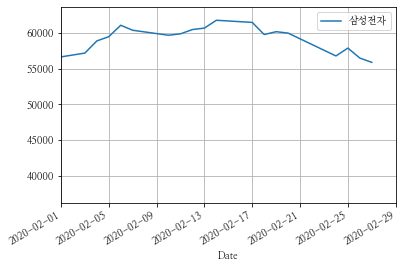

In [13]:
df[['삼성전자']].plot(xlim=['2020-02-01','2020-02-29']) 